In [110]:
import pandas as pd
import numpy  as np
import operator

import matplotlib.pyplot as plt
import itertools    
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from src.main import prepare_attribut_data, prepare_result_data
from src.main import convert_to_one_hot

from sklearn.decomposition import PCA

In [111]:
train_path_away = '../data/Train_Data/train_away_team_statistics_df.csv'
train_path_home = '../data/Train_Data/train_home_team_statistics_df.csv'
train_path_result = '../data/Train_Data/Y_train.csv'
df_attribut = prepare_attribut_data(train_path_away, train_path_home)
df_result = prepare_result_data(train_path_result)

In [112]:
df_attribut.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [113]:
df_result.head()

,result
0,1
1,0
2,1
3,2
4,0


In [114]:
from sklearn.model_selection import train_test_split

attribut_train, attribut_test, result_train, result_test = train_test_split(df_attribut.drop(['ID'], axis=1), df_result, test_size=0.1,
                                                                            random_state=10)


In [115]:
df_result.head()

,result
0,1
1,0
2,1
3,2
4,0


In [116]:
n_components = 3

pca = PCA(n_components=n_components)
pca.fit(attribut_train)

attribut_train_reduced = pd.DataFrame(pca.transform(attribut_train), index=attribut_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
attribut_test_reduced = pd.DataFrame(pca.transform(attribut_test), index=attribut_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

C:\Users\pc\AppData\Local\Temp\ipykernel_13704\2970429361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')


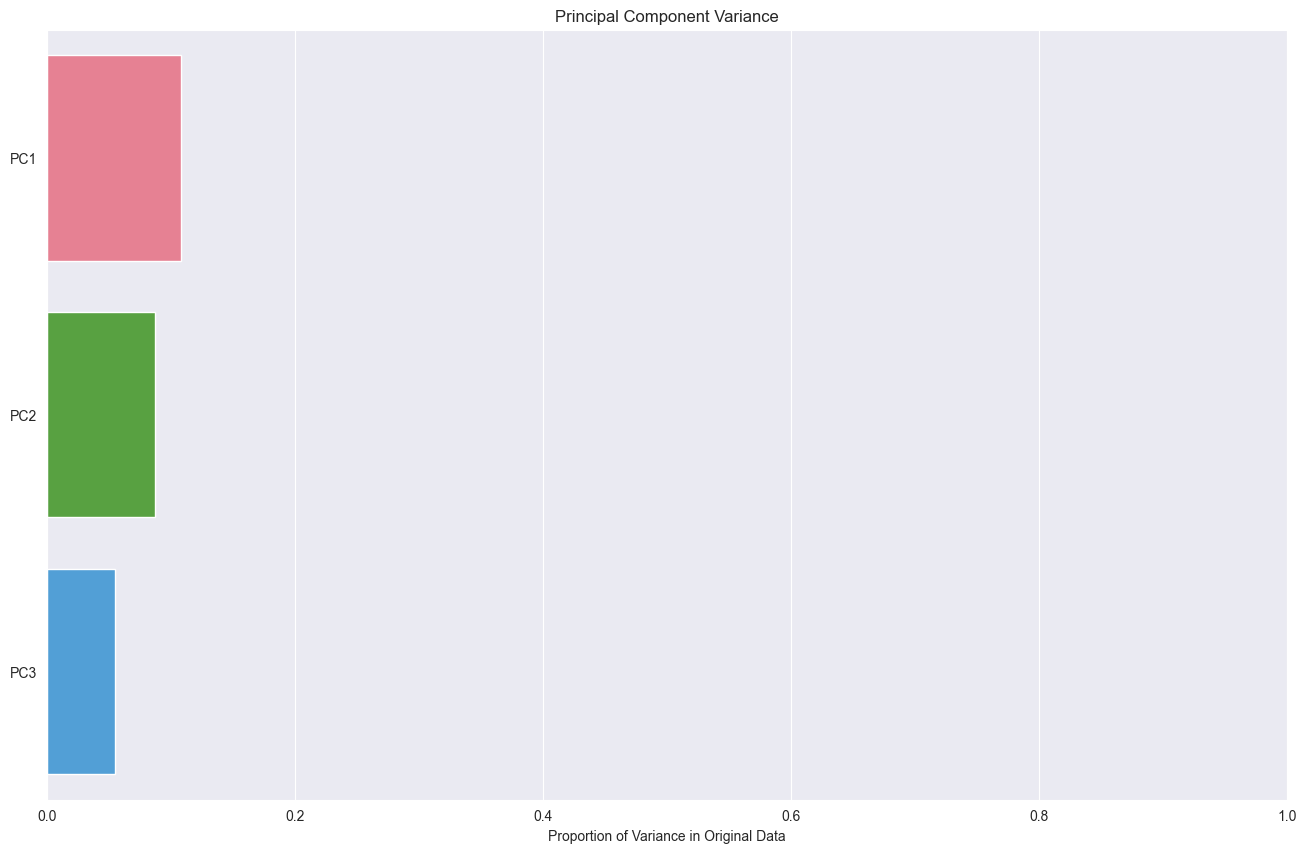

In [117]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

In [118]:
from sklearn.linear_model import LogisticRegression
max_iter_list=[3000]
solver_list=['lbfgs', 'liblinear']
regularization_factor_list=[1,0.01]
accuracy_dict={}
LR_dict={}
for max_iter in max_iter_list:
    for solver in solver_list:
        for regularization_factor in regularization_factor_list:
            LR = LogisticRegression(max_iter=max_iter,solver=solver,C=regularization_factor).fit(attribut_train_reduced, result_train)
            yhat = LR.predict(attribut_test_reduced)
            accuracy=np.round(accuracy_score(result_test,yhat),4)
            key=f'solver_{solver}_iter_{max_iter}_C_{regularization_factor}'
            accuracy_dict[key]=accuracy
            LR_dict[key]=LR
                        


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWar

In [119]:
accuracy_dict

{'solver_lbfgs_iter_3000_C_1': 0.4809,
 'solver_lbfgs_iter_3000_C_0.01': 0.4809,
 'solver_liblinear_iter_3000_C_1': 0.4825,
 'solver_liblinear_iter_3000_C_0.01': 0.4809}

In [120]:
max_accuracy=max(accuracy_dict.items(), key=operator.itemgetter(1))
LR_best=LR_dict[max_accuracy[0]]

In [121]:
max_accuracy

('solver_liblinear_iter_3000_C_1', 0.4825)

In [122]:
yhat = LR_best.predict(attribut_test_reduced)
np.round(accuracy_score(result_test,yhat),4)

0.4825

In [123]:
attribut_test_reduced

,PC1,PC2,PC3
11028,-7.587089,9.706078,16.903392
10284,3.120619,1.906861,11.490117
10177,-9.207367,-1.331856,9.451661
7139,18.409915,-8.683943,-8.243424
937,-8.148630,-19.809059,3.033028
...,...,...,...
10569,21.827628,-32.864624,-3.699276
10359,-6.674266,-11.376881,-3.516690
745,-0.424210,-17.075515,2.350238
10906,-2.895703,-3.867357,10.494537


In [124]:
result_test

,result
11028,2
10284,1
10177,2
7139,2
937,1
...,...
10569,2
10359,2
745,1
10906,0


In [130]:
yhat

array([2, 2, 2, ..., 1, 2, 2])

In [135]:
yhat==2


array([ True,  True,  True, ..., False,  True,  True])

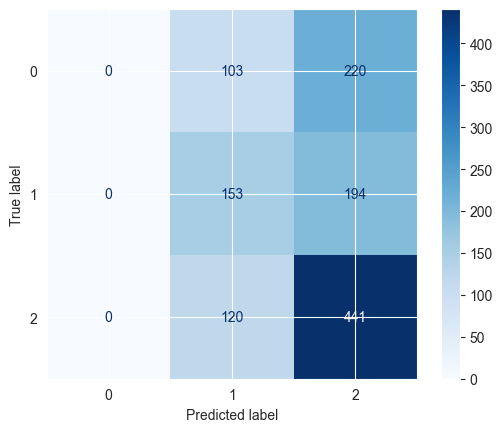

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2],)
disp.plot(cmap="Blues")

In [126]:
test_path_away = '../data/Test_Data/test_away_team_statistics_df.csv'
test_path_home = '../data/Test_Data/test_home_team_statistics_df.csv'
df_attribut_test = prepare_attribut_data(test_path_away, test_path_home,True)

KeyError: "['LEAGUE', 'TEAM_NAME'] not found in axis"

In [ ]:

yhat_test = LR_best.predict(df_attribut_test)
y_pred_test = pd.DataFrame(yhat_test)
y_pred_test = convert_to_one_hot(yhat_test)

In [ ]:
y_pred_testtest_prediction = pd.concat([df_attribut_test['ID'], y_pred_test], axis=1)


In [ ]:
test_prediction = y_pred_test.index.to_frame(name='ID').join(y_pred_test)

In [ ]:
test_prediction

In [ ]:
test_prediction.to_csv('./submission/pca_logistic_benchmark_submission.csv', index=False)